#### This Notebook will <li> retrieve the cleaned stored dataset <li> isolate the domains names from all the contact emails <li>calculate the frequency of each email domain submission  <li> plot and annotate the vertical historgram of the domains

How are the email domains distributed amongst our 3 million records?

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Retrieve stored dataframe

In [3]:
%store -r df

Split the domain names into their own column.

In [5]:
# how are the email domain names split up with our 3 million dataset?
df['domain'] = df['contact_email'].str.split("@").str[1]
df['domain'] = df['domain'].str.lower()

Explore the domain names: 'hurra.de' does not exist, these must be spammed emails. 'Pornhub.com' has over 300K submissions. Most of those names we saw have inaccurate addresses and Russian names.

In [4]:
# Quite a few pornhub.com and hurra.de accounts, these are probably fake.
df['domain'].value_counts().head(20)

gmail.com         708567
hurra.de          359826
pornhub.com       303002
yahoo.com         287767
hotmail.com        84894
aol.com            73660
comcast.net        31709
msn.com            15650
att.net            14118
icloud.com         13902
sbcglobal.net      13788
outlook.com        10998
live.com           10443
jourrapide.com      9438
einrot.com          9435
fleckens.hu         9392
verizon.net         9368
cuvox.de            9277
superrito.com       9186
rhyta.com           9182
Name: domain, dtype: int64

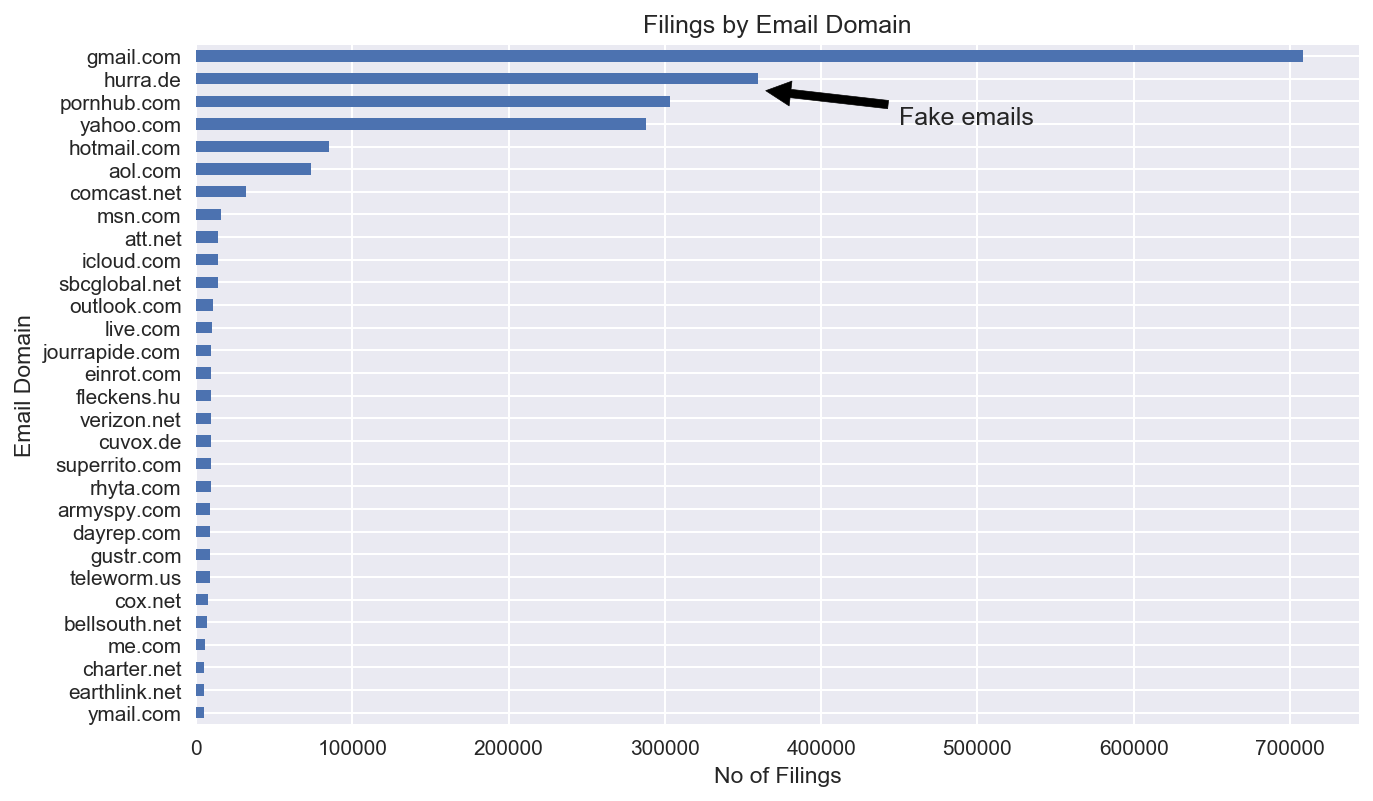

In [6]:
#Plot the histogram of the domains to visualize the magnitude of fake emails.
plt.figure( figsize=(10,6), dpi=150, facecolor='w', edgecolor='k')
sns.set()
df['domain'].value_counts()[:30].plot(kind='barh')
plt.xlabel('No of Filings')
plt.ylabel('Email Domain')
plt.title('Filings by Email Domain')
plt.grid(True)
plt.annotate('Fake emails', xy=(360000, 1.5), xytext=(450000, 3),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.gca().invert_yaxis()
plt.show()